<a href="https://colab.research.google.com/github/OJB-Quantum/QC-Hardware-How-To/blob/main/Jupyter%20Notebook%20Scripts/3D_Eigenmode_Plotting_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

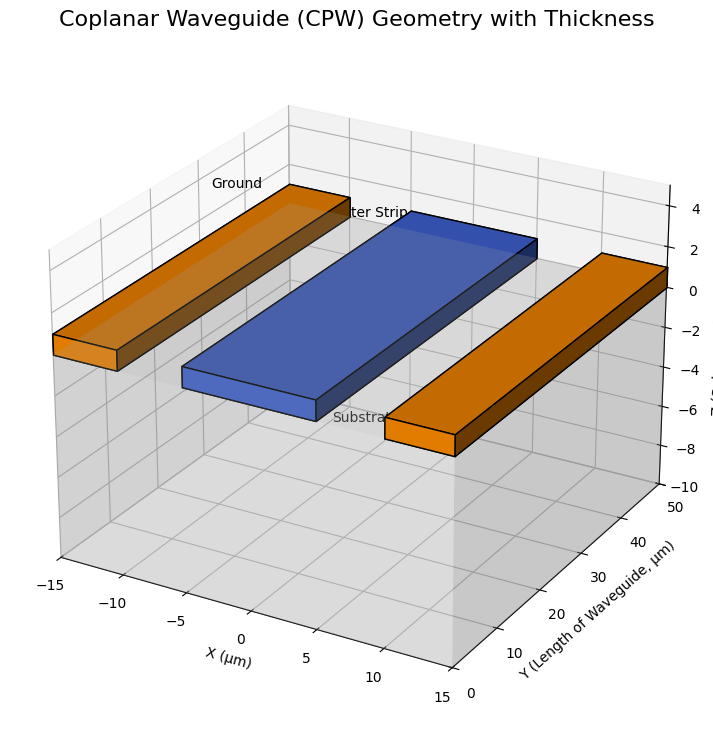

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Step 1: Define the Geometry ---
# These parameters are identical to those in plot_eigenmode.py
# All units are in micrometers (μm)
center_strip_width = 10.0
gap_width = 5.0
cpw_length = 50.0
substrate_thickness = 10.0
conductor_thickness = 1.0 # New parameter for conductor height

# Define the simulation box dimensions to set plot limits
x_max = center_strip_width / 2 + 2 * gap_width
y_max = cpw_length
z_max = substrate_thickness

# --- Step 2: Create a 3D plot ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# --- Step 3: Define and Plot the 3D Objects ---

def plot_cuboid(x_range, y_range, z_range, color):
    """Helper function to create and plot a 3D cuboid."""
    # Get the min/max for each range
    x0, x1 = x_range
    y0, y1 = y_range
    z0, z1 = z_range

    # Create meshgrids for the faces
    # Top and bottom faces
    xx_tb, yy_tb = np.meshgrid([x0, x1], [y0, y1])
    ax.plot_surface(xx_tb, yy_tb, np.full_like(xx_tb, z1), color=color, edgecolor='k', rstride=1, cstride=1)
    ax.plot_surface(xx_tb, yy_tb, np.full_like(xx_tb, z0), color=color, edgecolor='k', rstride=1, cstride=1)

    # Front and back faces
    xx_fb, zz_fb = np.meshgrid([x0, x1], [z0, z1])
    ax.plot_surface(xx_fb, np.full_like(xx_fb, y1), zz_fb, color=color, edgecolor='k', rstride=1, cstride=1)
    ax.plot_surface(xx_fb, np.full_like(xx_fb, y0), zz_fb, color=color, edgecolor='k', rstride=1, cstride=1)

    # Left and right faces
    yy_lr, zz_lr = np.meshgrid([y0, y1], [z0, z1])
    ax.plot_surface(np.full_like(yy_lr, x1), yy_lr, zz_lr, color=color, edgecolor='k', rstride=1, cstride=1)
    ax.plot_surface(np.full_like(yy_lr, x0), yy_lr, zz_lr, color=color, edgecolor='k', rstride=1, cstride=1)


# 1. Plot the Center Conductor
plot_cuboid(
    x_range=[-center_strip_width/2, center_strip_width/2],
    y_range=[0, cpw_length],
    z_range=[0, conductor_thickness],
    color='royalblue'
)

# 2. Plot the First Ground Plane
plot_cuboid(
    x_range=[-x_max, -center_strip_width/2 - gap_width],
    y_range=[0, cpw_length],
    z_range=[0, conductor_thickness],
    color='darkorange'
)

# 3. Plot the Second Ground Plane
plot_cuboid(
    x_range=[center_strip_width/2 + gap_width, x_max],
    y_range=[0, cpw_length],
    z_range=[0, conductor_thickness],
    color='darkorange'
)

# 4. Plot the Substrate
# Make the substrate slightly transparent to distinguish it
def plot_transparent_cuboid(x_range, y_range, z_range, color):
    """Helper function to create and plot a 3D cuboid with transparency."""
    x0, x1 = x_range
    y0, y1 = y_range
    z0, z1 = z_range
    xx, yy = np.meshgrid([x0, x1], [y0, y1])
    ax.plot_surface(xx, yy, np.full_like(xx, z1), color=color, alpha=0.2)
    ax.plot_surface(xx, yy, np.full_like(xx, z0), color=color, alpha=0.2)
    xx, zz = np.meshgrid([x0, x1], [z0, z1])
    ax.plot_surface(xx, np.full_like(xx, y1), zz, color=color, alpha=0.2)
    ax.plot_surface(xx, np.full_like(xx, y0), zz, color=color, alpha=0.2)
    yy, zz = np.meshgrid([y0, y1], [z0, z1])
    ax.plot_surface(np.full_like(yy, x1), yy, zz, color=color, alpha=0.2)
    ax.plot_surface(np.full_like(yy, x0), yy, zz, color=color, alpha=0.2)

plot_transparent_cuboid(
    x_range=[-x_max, x_max],
    y_range=[0, cpw_length],
    z_range=[-substrate_thickness, 0],
    color='lightgray'
)


# --- Step 4: Formatting the Plot ---

# Set labels and title
ax.set_title('Coplanar Waveguide (CPW) Geometry with Thickness', fontsize=16)
ax.set_xlabel('X (μm)')
ax.set_ylabel('Y (Length of Waveguide, μm)')
ax.set_zlabel('Z (Substrate Depth, μm)')

# Set plot limits to match the simulation box
ax.set_xlim([-x_max, x_max])
ax.set_ylim([0, y_max])
ax.set_zlim([-z_max, z_max/2]) # Show a bit of substrate depth for context

# Set view angle for better visualization
ax.view_init(elev=25, azim=-60)

# Add annotations to identify parts, adjusting Z position for thickness
ax.text(0, y_max/2, conductor_thickness + 4, "Center Strip", color='black', ha='center')
ax.text(-x_max + 5, y_max/2, conductor_thickness + 4, "Ground", color='black', ha='center')
ax.text(x_max - 5, y_max/2, conductor_thickness + 4, "Ground", color='black', ha='center')
ax.text(0, y_max/2, -substrate_thickness/2, "Substrate", color='black', ha='center')


plt.show()

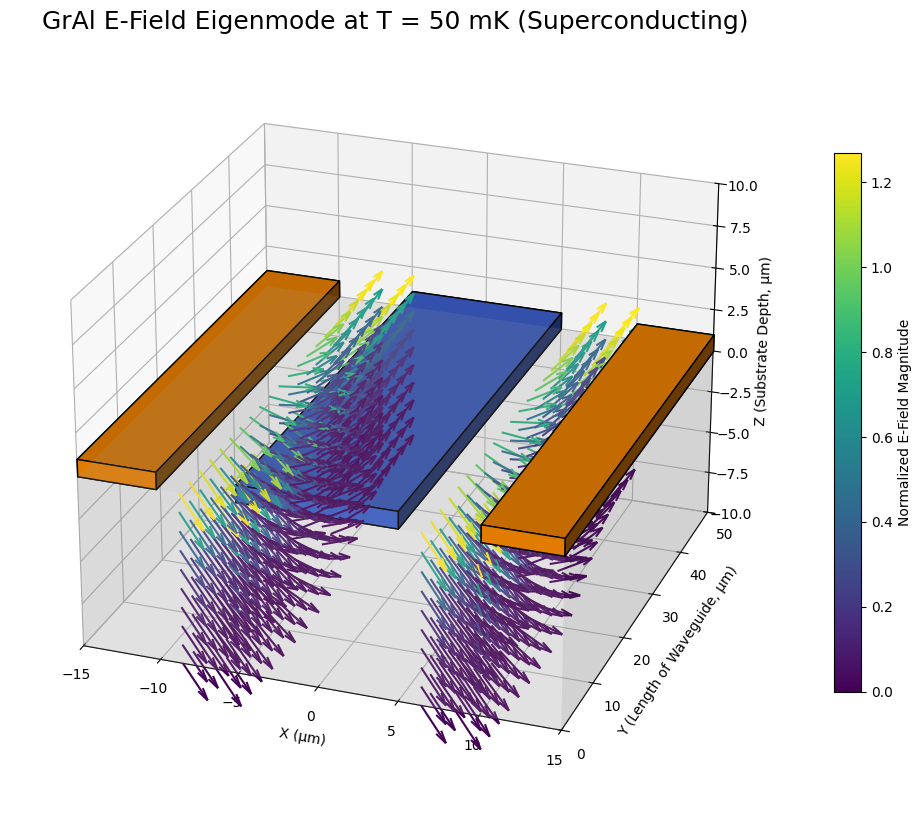

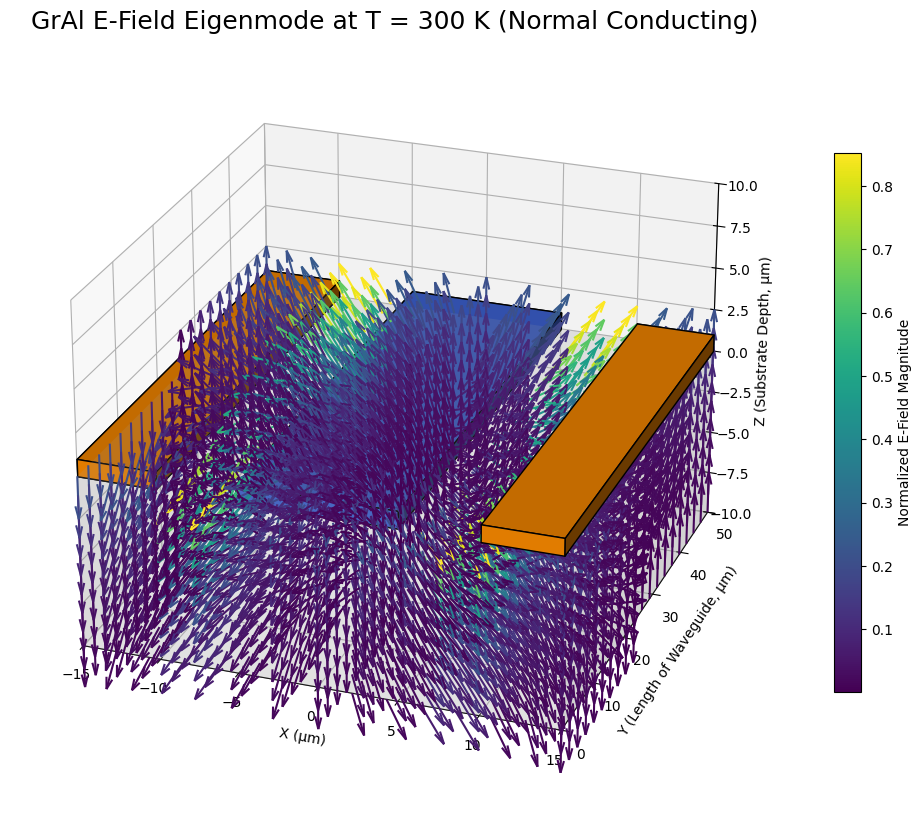

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Step 1: Define the Geometry ---
# All units are in micrometers (μm)
center_strip_width = 10.0
gap_width = 5.0
cpw_length = 50.0
substrate_thickness = 10.0
conductor_thickness = 1.0

# --- Step 2: Mock Data Generation for Granular Aluminum (GrAl) ---
# This section simulates the data you would get from FEA software.

def get_efield_50mK(x, y, z):
    """
    Generates a mock E-field for the superconducting state (50 mK).
    The field is strongly confined to the gaps and perpendicular to conductors.
    """
    Ex = np.zeros_like(x)
    Ey = np.zeros_like(x)
    Ez = np.zeros_like(x)

    # Field in the left gap
    gap_left_mask = (x > -center_strip_width/2 - gap_width) & (x < -center_strip_width/2)
    # The z coordinate is now negative within the substrate, so exp(z/...) correctly models decay.
    Ex[gap_left_mask] = np.sin(np.pi * x[gap_left_mask] / gap_width) * np.exp(z[gap_left_mask]/2)
    Ez[gap_left_mask] = -np.cos(np.pi * y[gap_left_mask] / cpw_length) * np.exp(z[gap_left_mask]/2)

    # Field in the right gap
    gap_right_mask = (x > center_strip_width/2) & (x < center_strip_width/2 + gap_width)
    Ex[gap_right_mask] = -np.sin(np.pi * x[gap_right_mask] / gap_width) * np.exp(z[gap_right_mask]/2)
    Ez[gap_right_mask] = -np.cos(np.pi * y[gap_right_mask] / cpw_length) * np.exp(z[gap_right_mask]/2)

    return Ex, Ey, Ez

def get_efield_300K(x, y, z):
    """
    Generates a mock E-field for the normal conducting state (300 K).
    The field is weaker, more diffuse, and penetrates into the substrate.
    """
    # The field is less confined and penetrates deeper for GrAl
    decay_factor = 4.0
    # The z coordinate is now negative within the substrate, so exp(z/...) correctly models decay.
    Ex = np.sin(np.pi * x / (center_strip_width + gap_width)) * np.exp(z / decay_factor) * 0.5
    Ey = np.zeros_like(x)
    Ez = -np.cos(np.pi * y / cpw_length) * np.exp(z / decay_factor) * 0.7

    # Reduce field strength inside conductors to simulate penetration
    conductor_mask = (abs(x) < center_strip_width/2) | \
                     (abs(x) > center_strip_width/2 + gap_width)
    Ex[conductor_mask] *= 0.3
    Ez[conductor_mask] *= 0.3

    return Ex, Ey, Ez

# --- Step 3: Plotting Functions ---

def plot_cuboid(ax, x_range, y_range, z_range, color, alpha=1.0):
    """Helper function to create and plot a 3D cuboid."""
    x0, x1 = x_range
    y0, y1 = y_range
    z0, z1 = z_range
    xx, yy = np.meshgrid([x0, x1], [y0, y1])
    ax.plot_surface(xx, yy, np.full_like(xx, z1), color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    ax.plot_surface(xx, yy, np.full_like(xx, z0), color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    xx, zz = np.meshgrid([x0, x1], [z0, z1])
    ax.plot_surface(xx, np.full_like(xx, y1), zz, color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    ax.plot_surface(xx, np.full_like(xx, y0), zz, color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    yy, zz = np.meshgrid([y0, y1], [z0, z1])
    ax.plot_surface(np.full_like(yy, x1), yy, zz, color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    ax.plot_surface(np.full_like(yy, x0), yy, zz, color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)

def create_combined_plot(temperature):
    """Main function to generate a single plot for a given temperature."""
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the solid geometry
    x_max = center_strip_width / 2 + 2 * gap_width
    plot_cuboid(ax, [-center_strip_width/2, center_strip_width/2], [0, cpw_length], [0, conductor_thickness], 'royalblue')
    plot_cuboid(ax, [-x_max, -center_strip_width/2 - gap_width], [0, cpw_length], [0, conductor_thickness], 'darkorange')
    plot_cuboid(ax, [center_strip_width/2 + gap_width, x_max], [0, cpw_length], [0, conductor_thickness], 'darkorange')
    plot_cuboid(ax, [-x_max, x_max], [0, cpw_length], [-substrate_thickness, 0], 'lightgray', alpha=0.15)

    # Create a grid for the vector field inside the substrate (z <= 0)
    x_pts = np.linspace(-x_max, x_max, 15)
    y_pts = np.linspace(0, cpw_length, 20)
    z_pts = np.linspace(0, -substrate_thickness, 10) # Generate z-points from the surface downwards
    X, Y, Z = np.meshgrid(x_pts, y_pts, z_pts)

    # Get E-field data based on temperature
    if temperature == 50:
        Ex, Ey, Ez = get_efield_50mK(X, Y, Z)
        title = 'GrAl E-Field Eigenmode at T = 50 mK (Superconducting)'
    else:
        Ex, Ey, Ez = get_efield_300K(X, Y, Z)
        title = 'GrAl E-Field Eigenmode at T = 300 K (Normal Conducting)'

    # Normalize vectors for consistent arrow size
    magnitude = np.sqrt(Ex**2 + Ey**2 + Ez**2)
    with np.errstate(invalid='ignore'): # Ignore division by zero for zero-magnitude vectors
        U = Ex / magnitude
        V = Ey / magnitude
        W = Ez / magnitude

    # Plot the vector field
    # The 'array' argument needs a 1D array, so we flatten 'magnitude' with .ravel()
    quiver_plot = ax.quiver(X, Y, Z, U, V, W, length=2.5, normalize=True, cmap='viridis', array=magnitude.ravel())
    fig.colorbar(quiver_plot, ax=ax, shrink=0.7, aspect=20, label='Normalized E-Field Magnitude')

    # Formatting
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('X (μm)')
    ax.set_ylabel('Y (Length of Waveguide, μm)')
    ax.set_zlabel('Z (Substrate Depth, μm)')
    ax.set_xlim([-x_max, x_max])
    ax.set_ylim([0, cpw_length])
    ax.set_zlim([-substrate_thickness, substrate_thickness])
    ax.view_init(elev=25, azim=-70)
    plt.show()

# --- Step 4: Generate Both Plots for GrAl ---
create_combined_plot(temperature=50)
create_combined_plot(temperature=300)

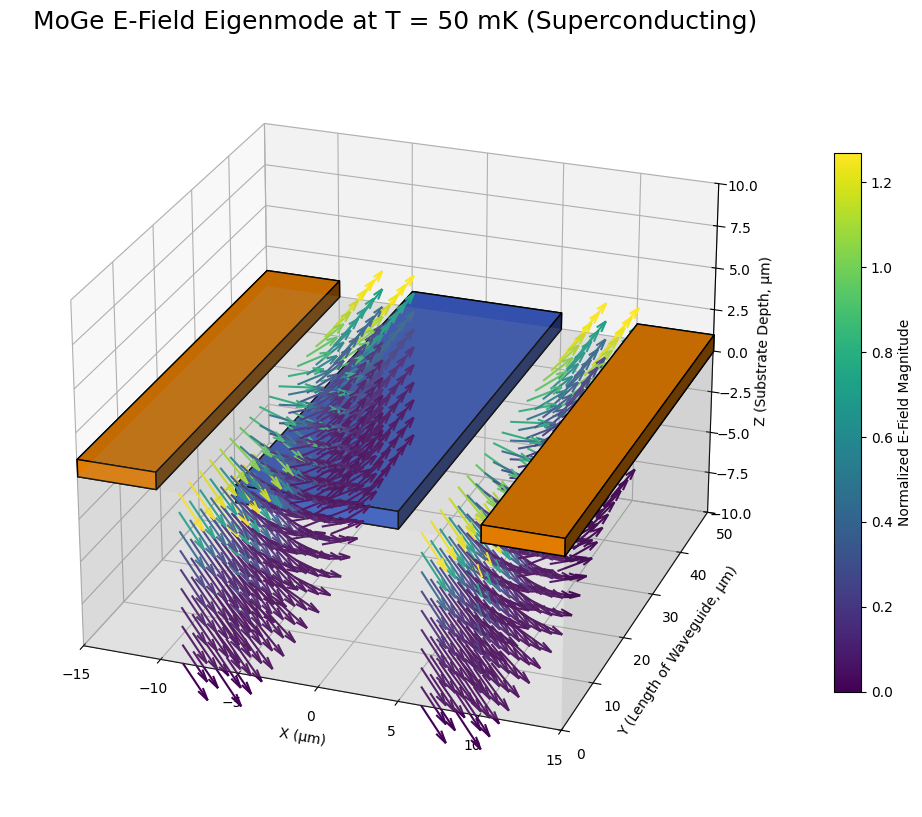

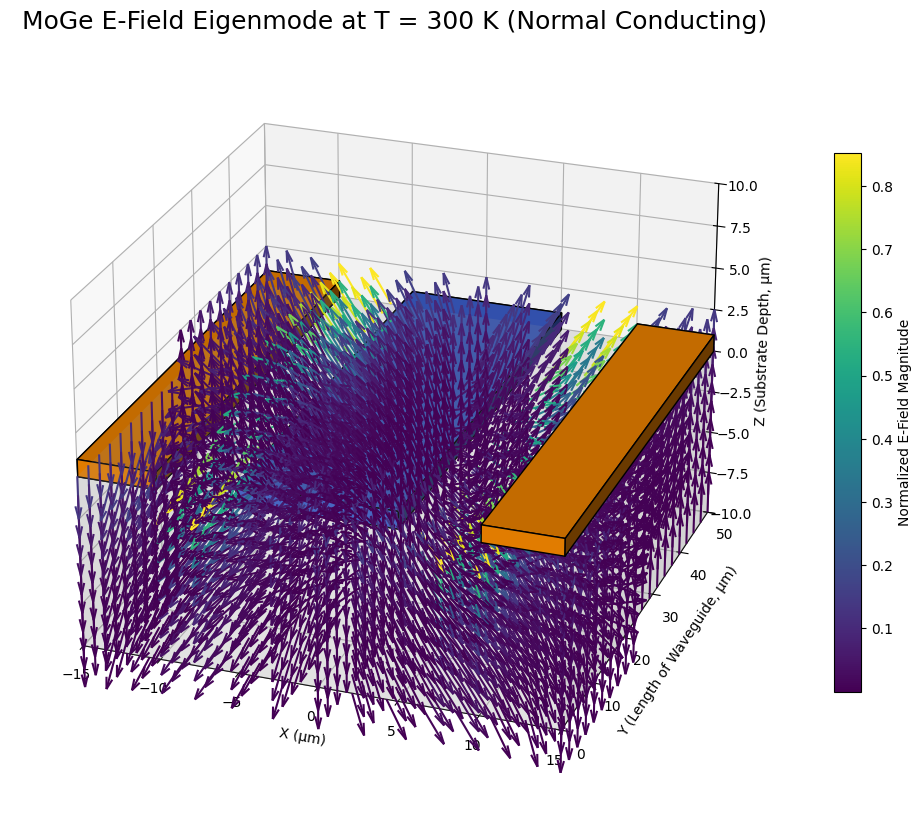

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Step 1: Define the Geometry (Same as before) ---
# All units are in micrometers (μm)
center_strip_width = 10.0
gap_width = 5.0
cpw_length = 50.0
substrate_thickness = 10.0
conductor_thickness = 1.0

# --- Step 2: Mock Data Generation for Molybdenum Germanium (MoGe) ---

def get_efield_MoGe_50mK(x, y, z):
    """
    Generates a mock E-field for the superconducting state (50 mK).
    The physics (field expulsion) is the same as for GrAl.
    """
    Ex = np.zeros_like(x)
    Ey = np.zeros_like(x)
    Ez = np.zeros_like(x)

    # Field in the left gap
    gap_left_mask = (x > -center_strip_width/2 - gap_width) & (x < -center_strip_width/2)
    Ex[gap_left_mask] = np.sin(np.pi * x[gap_left_mask] / gap_width) * np.exp(z[gap_left_mask]/2)
    Ez[gap_left_mask] = -np.cos(np.pi * y[gap_left_mask] / cpw_length) * np.exp(z[gap_left_mask]/2)

    # Field in the right gap
    gap_right_mask = (x > center_strip_width/2) & (x < center_strip_width/2 + gap_width)
    Ex[gap_right_mask] = -np.sin(np.pi * x[gap_right_mask] / gap_width) * np.exp(z[gap_right_mask]/2)
    Ez[gap_right_mask] = -np.cos(np.pi * y[gap_right_mask] / cpw_length) * np.exp(z[gap_right_mask]/2)

    return Ex, Ey, Ez

def get_efield_MoGe_300K(x, y, z):
    """
    Generates a mock E-field for the normal conducting state (300 K).
    MoGe is a better normal-state conductor than GrAl, so the field penetrates less.
    """
    # A smaller decay_factor models a smaller skin depth (faster decay)
    decay_factor = 2.5
    Ex = np.sin(np.pi * x / (center_strip_width + gap_width)) * np.exp(z / decay_factor) * 0.5
    Ey = np.zeros_like(x)
    Ez = -np.cos(np.pi * y / cpw_length) * np.exp(z / decay_factor) * 0.7

    # Reduce field strength inside conductors to simulate penetration
    conductor_mask = (abs(x) < center_strip_width/2) | \
                     (abs(x) > center_strip_width/2 + gap_width)
    Ex[conductor_mask] *= 0.2 # Field is screened more effectively
    Ez[conductor_mask] *= 0.2

    return Ex, Ey, Ez

# --- Step 3: Plotting Functions (Same as before) ---

def plot_cuboid(ax, x_range, y_range, z_range, color, alpha=1.0):
    """Helper function to create and plot a 3D cuboid."""
    x0, x1 = x_range
    y0, y1 = y_range
    z0, z1 = z_range
    xx, yy = np.meshgrid([x0, x1], [y0, y1])
    ax.plot_surface(xx, yy, np.full_like(xx, z1), color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    ax.plot_surface(xx, yy, np.full_like(xx, z0), color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    xx, zz = np.meshgrid([x0, x1], [z0, z1])
    ax.plot_surface(xx, np.full_like(xx, y1), zz, color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    ax.plot_surface(xx, np.full_like(xx, y0), zz, color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    yy, zz = np.meshgrid([y0, y1], [z0, z1])
    ax.plot_surface(np.full_like(yy, x1), yy, zz, color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)
    ax.plot_surface(np.full_like(yy, x0), yy, zz, color=color, alpha=alpha, edgecolor='k' if alpha==1.0 else 'none', rstride=1, cstride=1)

def create_moge_plot(temperature):
    """Main function to generate a single plot for a given temperature."""
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the solid geometry
    x_max = center_strip_width / 2 + 2 * gap_width
    plot_cuboid(ax, [-center_strip_width/2, center_strip_width/2], [0, cpw_length], [0, conductor_thickness], 'royalblue')
    plot_cuboid(ax, [-x_max, -center_strip_width/2 - gap_width], [0, cpw_length], [0, conductor_thickness], 'darkorange')
    plot_cuboid(ax, [center_strip_width/2 + gap_width, x_max], [0, cpw_length], [0, conductor_thickness], 'darkorange')
    plot_cuboid(ax, [-x_max, x_max], [0, cpw_length], [-substrate_thickness, 0], 'lightgray', alpha=0.15)

    # Create a grid for the vector field inside the substrate
    x_pts = np.linspace(-x_max, x_max, 15)
    y_pts = np.linspace(0, cpw_length, 20)
    z_pts = np.linspace(0, -substrate_thickness, 10)
    X, Y, Z = np.meshgrid(x_pts, y_pts, z_pts)

    # Get E-field data based on temperature
    if temperature == 50:
        Ex, Ey, Ez = get_efield_MoGe_50mK(X, Y, Z)
        title = 'MoGe E-Field Eigenmode at T = 50 mK (Superconducting)'
    else:
        Ex, Ey, Ez = get_efield_MoGe_300K(X, Y, Z)
        title = 'MoGe E-Field Eigenmode at T = 300 K (Normal Conducting)'

    # Normalize vectors for consistent arrow size
    magnitude = np.sqrt(Ex**2 + Ey**2 + Ez**2)
    with np.errstate(invalid='ignore'):
        U = Ex / magnitude
        V = Ey / magnitude
        W = Ez / magnitude

    # Plot the vector field
    quiver_plot = ax.quiver(X, Y, Z, U, V, W, length=2.5, normalize=True, cmap='viridis', array=magnitude.ravel())
    fig.colorbar(quiver_plot, ax=ax, shrink=0.7, aspect=20, label='Normalized E-Field Magnitude')

    # Formatting
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('X (μm)')
    ax.set_ylabel('Y (Length of Waveguide, μm)')
    ax.set_zlabel('Z (Substrate Depth, μm)')
    ax.set_xlim([-x_max, x_max])
    ax.set_ylim([0, cpw_length])
    ax.set_zlim([-substrate_thickness, substrate_thickness])
    ax.view_init(elev=25, azim=-70)
    plt.show()

# --- Step 4: Generate Both Plots for MoGe ---
create_moge_plot(temperature=50)
create_moge_plot(temperature=300)
